# Sensor Data Visualization

In [17]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
from pandas.tools.plotting import parallel_coordinates
import operator
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
#plt.style.use('ggplot')

%matplotlib inline

## Wireshark Data

In [2]:
data = pd.read_csv('sensordata.csv',parse_dates=['Time'])
data2 = data.set_index('Time',drop=False)
data2.head(5)

,No.,Time,Source,Destination,Protocol,Length,Source Port,Dest Port
Time,,,,,,,,
2016-05-12 04:03:31.844865,1,2016-05-12 04:03:31.844865,fe80::cd08:1cb2:ac23:6866,ff02::1:2,DHCPv6,157,546.0,547.0
2016-05-12 04:03:32.048667,2,2016-05-12 04:03:32.048667,192.168.1.114,Broadcast,ARP,42,NaN,NaN
2016-05-12 04:03:33.893024,3,2016-05-12 04:03:33.893024,fe80::cd08:1cb2:ac23:6866,ff02::1:2,DHCPv6,157,546.0,547.0
2016-05-12 04:03:37.886484,4,2016-05-12 04:03:37.886484,fe80::cd08:1cb2:ac23:6866,ff02::1:2,DHCPv6,157,546.0,547.0
2016-05-12 04:03:40.855326,5,2016-05-12 04:03:40.855326,192.168.1.106,Broadcast,ARP,60,NaN,NaN


In [3]:
dest = pd.DataFrame(data2.Destination)
proto = pd.DataFrame(data2.Protocol)

In [4]:
# Make a column of ones and attach to both destination and protocol dataframes
onez = pd.DataFrame(np.ones(len(data2.Destination)), index=dest.index)
onez.columns = ['count']
destcount = dest.join(onez)
protocount = proto.join(onez)

In [5]:
destpvt = pd.pivot_table(destcount, values='count', index=destcount.index, columns='Destination').fillna(0)
protopvt = pd.pivot_table(protocount, values='count', index=protocount.index, columns='Protocol').fillna(0)
destpvt = destpvt.resample('5s', closed='left').sum().fillna(0)
protopvt = protopvt.resample('5s', closed='left').sum().fillna(0)

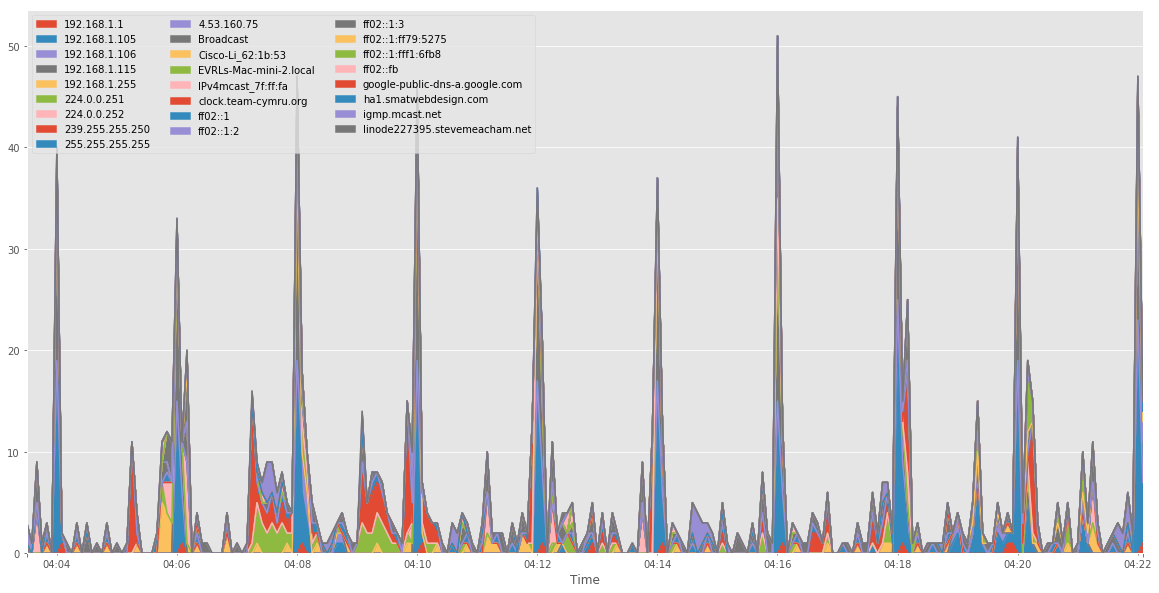

In [19]:
destpvt.plot.area(figsize=(20,10)).legend(loc='upper left',ncol=3);

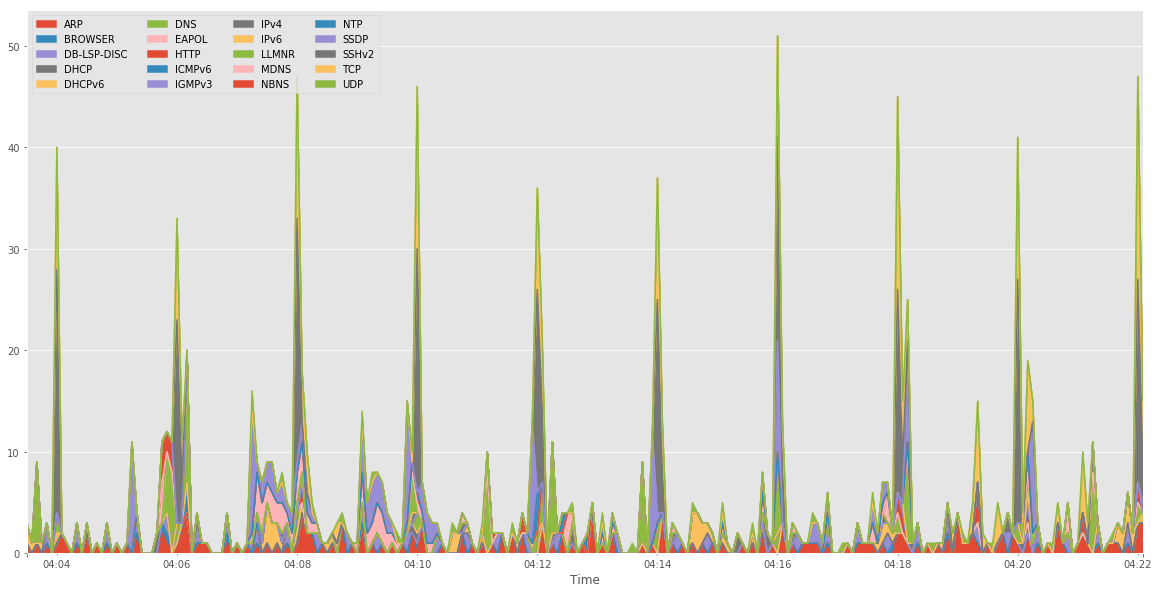

In [21]:
protopvt.plot.area(figsize=(20,10)).legend(loc='upper left',ncol=4);

In [22]:
temp = list(data2.Destination.value_counts().head(10).index)

In [23]:
top10_pvt = destpvt.filter(temp)

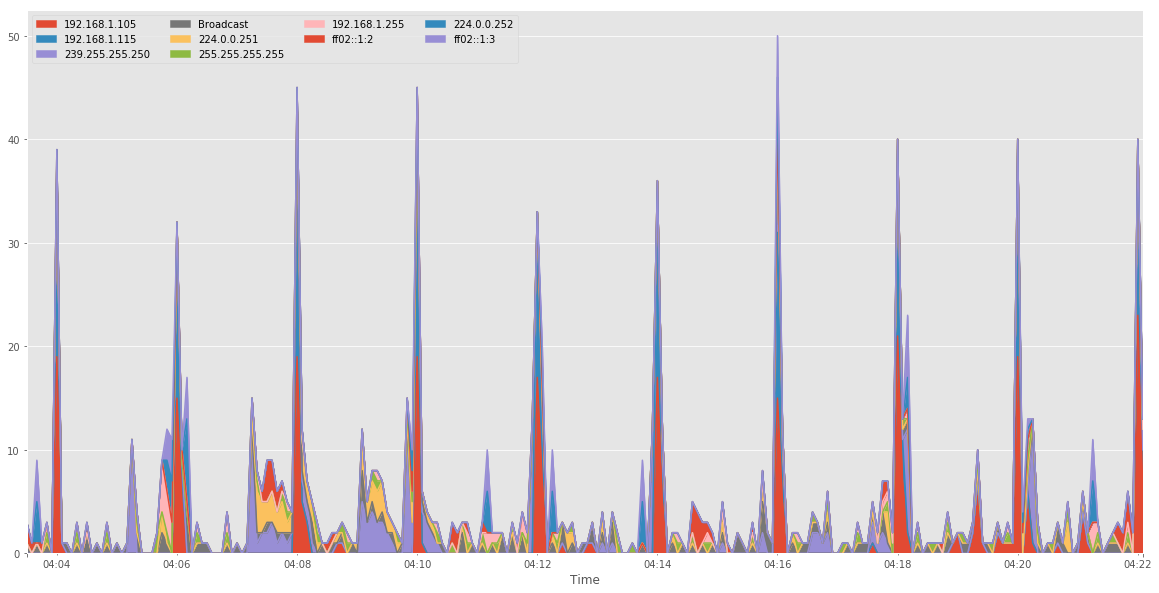

In [24]:
top10_pvt.plot.area(figsize=(20,10)).legend(loc='upper left',ncol=4);

The cell below filters out the top 2 destination IP addresses which correspond to the sensor IP and the SSH computer. The new graph does not reveal much information.

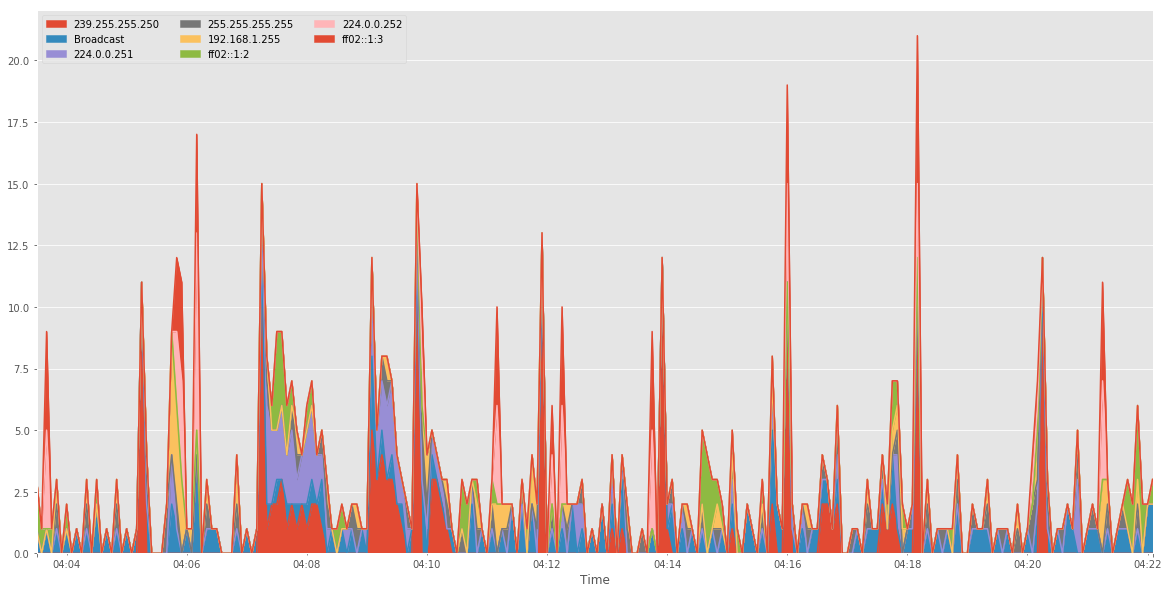

In [25]:
temp2 = list(data2.Destination.value_counts().head(10).index)
pvt_minus_max2 = destpvt.filter(temp2[2:])
pvt_minus_max2.plot.area(figsize=(20,10)).legend(loc='upper left',ncol=3);

The cell below plots traffic from the top destination IP address

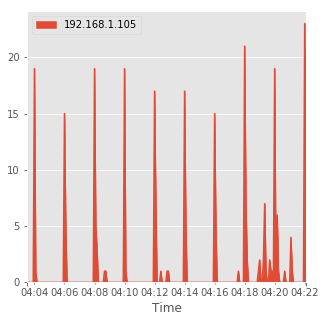

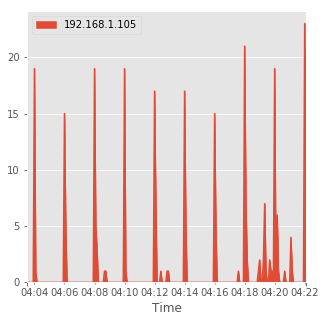

In [26]:
pvt_sensor= destpvt.filter(temp2[:1])
pvt_sensor.plot.area(figsize=(5,5)).legend(loc='upper left'), pvt_sensor.plot.area(figsize=(5,5)).legend(loc='upper left');

In [ ]:
plt.show()